In [1]:
import os
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
nltk.download('stopwords')
folder_path = os.path.expanduser('~/Downloads/UN_data/TXT')
processed_speeches = []
stop_words = set(stopwords.words('english'))

nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shantanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shantanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Define the directory containing the session folders
base_directory = "C:/Users/Shantanu/Downloads/UN_data/TXT"

# Initialize an empty dictionary to hold the data
data = {}

def create_dataframe():
    # Traverse through all directories in the base directory
    for folder in os.listdir(base_directory):
        folder_path = os.path.join(base_directory, folder)

        # Check if the folder is a directory and follows the "Session XX - YYYY" format
        if os.path.isdir(folder_path) and "Session" in folder:
            # Extract the year from the folder name (e.g., "1948" from "Session 03 - 1948")
            year = folder.split('-')[-1].strip()

            # Traverse through all files in the current session folder
            for file in os.listdir(folder_path):
                if file.endswith('.txt') and not file.startswith("._"):
                    # Extract the country code (first 3 letters of the file name)
                    country_code = file[:3]

                    # Read the content of the file
                    file_path = os.path.join(folder_path, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        text_content = f.read()

                    # Add the content to the data dictionary
                    if country_code not in data:
                        data[country_code] = {}  # Initialize a new dict for the country
                    data[country_code][year] = text_content  # Add the speech content for the year

    # Convert the data dictionary into a pandas DataFrame
    df = pd.DataFrame(data).T  # Transpose so that countries are rows and years are columns
    
    return df

In [4]:
df = create_dataframe()

In [5]:
print(list(df.index))

['ARG', 'AUS', 'BEL', 'BLR', 'BOL', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CSK', 'CUB', 'ECU', 'EGY', 'FRA', 'GBR', 'GRC', 'HTI', 'IND', 'IRN', 'LBN', 'LBR', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL', 'PER', 'PHL', 'POL', 'RUS', 'SAU', 'SYR', 'TUR', 'UKR', 'URY', 'USA', 'VEN', 'YUG', 'DOM', 'IRQ', 'SLV', 'SWE', 'THA', 'ZAF', 'DNK', 'MMR', 'PAK', 'ETH', 'ISR', 'GTM', 'HND', 'PAN', 'CRI', 'IDN', 'NIC', 'PRY', 'YEM', 'AFG', 'ISL', 'ALB', 'AUT', 'BGR', 'ESP', 'HUN', 'IRL', 'ITA', 'JOR', 'KHM', 'LAO', 'LBY', 'LKA', 'MAR', 'NPL', 'PRT', 'ROU', 'SDN', 'TUN', 'GHA', 'JPN', 'MYS', 'FIN', 'GIN', 'CMR', 'COG', 'CYP', 'MLI', 'CAF', 'COD', 'GAB', 'MDG', 'NER', 'NGA', 'SEN', 'SLE', 'SOM', 'TGO', 'BFA', 'DZA', 'JAM', 'MNG', 'MRT', 'BDI', 'BEN', 'KWT', 'RWA', 'TCD', 'TZA', 'UGA', 'KEN', 'MLT', 'MWI', 'TTO', 'ZMB', 'CIV', 'SGP', 'GUY', 'MDV', 'BRB', 'BWA', 'GMB', 'LSO', 'MUS', 'YMD', 'GNQ', 'SWZ', 'FJI', 'QAT', 'ARE', 'BHR', 'BTN', 'OMN', 'BHS', 'DDR', 'DEU', 'BGD', 'GRD', 'MOZ', 'COM', 'CPV', 'GNB', 'PNG', 'STP'

In [6]:
# Check for missing speeches
missing_data = df.isnull().sum()
print("Missing speeches by year:")
print(missing_data)

# Check for speeches with very short content
short_speeches = df.applymap(lambda x: len(x) if isinstance(x, str) else 0)
print("Speeches with less than 100 characters:")
print(short_speeches[short_speeches < 100].dropna(how='all'))

Missing speeches by year:
1946    162
1947    162
1949    166
1950    157
1951    150
       ... 
2020      8
2021      7
2022      8
2023      9
1948    162
Length: 78, dtype: int64
Speeches with less than 100 characters:
     1946  1947  1949  1950  1951  1952  1953  1954  1955  1956  ...  2015  \
ARG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
AUS   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
BEL   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...   NaN   
BOL   NaN   0.0   0.0   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   NaN   
CHL   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
TLS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   NaN   
MNE   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   NaN   
SRB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   NaN 

Speech length statistics (in words):
              1946          1947         1949         1950          1951  \
count   201.000000    201.000000   201.000000   201.000000    201.000000   
mean    475.492537    553.089552   452.791045   646.099502    828.243781   
std    1231.669546   1485.936123  1114.134398  1358.462436   1933.304336   
min       0.000000      0.000000     0.000000     0.000000      0.000000   
25%       0.000000      0.000000     0.000000     0.000000      0.000000   
50%       0.000000      0.000000     0.000000     0.000000      0.000000   
75%       0.000000      0.000000     0.000000     0.000000    881.000000   
max    7336.000000  11519.000000  6369.000000  6090.000000  19045.000000   

               1952          1953          1954          1955          1956  \
count    201.000000    201.000000    201.000000    201.000000    201.000000   
mean     847.930348    882.263682    893.611940    854.338308   1158.268657   
std     1903.985450   2052.764961   2174.

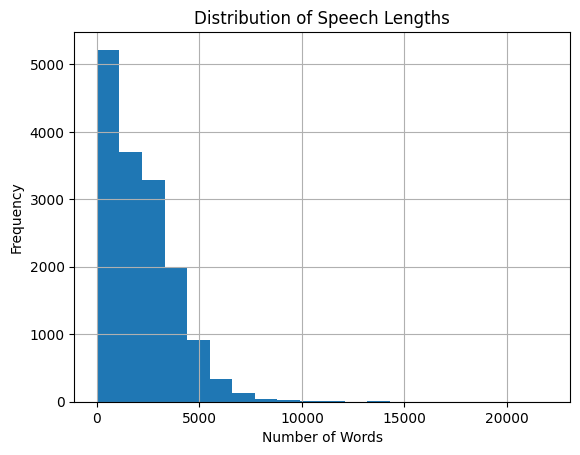

In [7]:
# Add a new column for speech lengths (word count) by year
speech_lengths = df.applymap(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Summary statistics of speech lengths
speech_stats = speech_lengths.describe()
print("Speech length statistics (in words):")
print(speech_stats)

# Plot the distribution of speech lengths for all speeches
import matplotlib.pyplot as plt

speech_lengths.stack().hist(bins=20)
plt.title("Distribution of Speech Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and tokenize speech text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize into words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to all speeches
df_cleaned = df.applymap(lambda x: preprocess_text(x) if isinstance(x, str) else x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shantanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shantanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df_cleaned.to_pickle("cleaned_df")

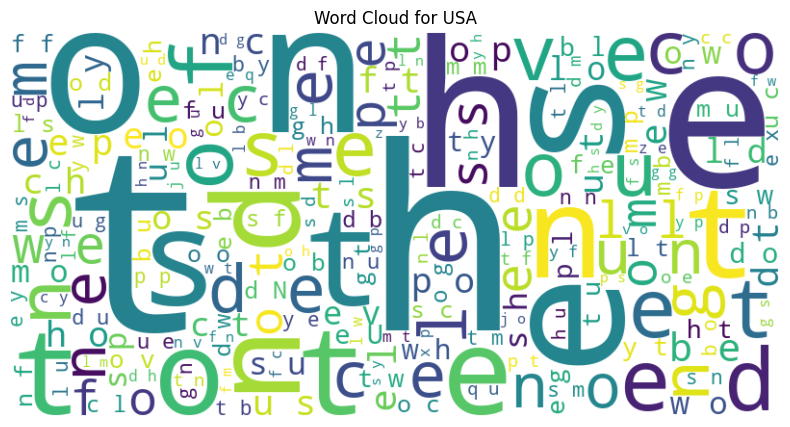

In [9]:
from wordcloud import WordCloud

# Combine all speeches into one text for each country
combined_texts = df.apply(lambda row: ' '.join([str(speech) for speech in row if isinstance(speech, str)]), axis=1)

# Generate and plot word cloud for a specific country (e.g., for 'USA')
country = 'USA'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_texts[country]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for {country}")
plt.show()

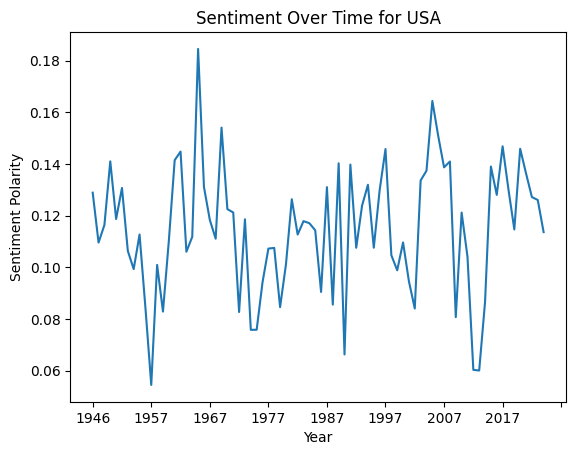

In [10]:
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each speech
sentiments = df.applymap(lambda x: get_sentiment(x) if isinstance(x, str) else None)

# Plot sentiment over time for a specific country
country = 'USA'
sentiments.loc[country].plot(kind='line')
plt.title(f"Sentiment Over Time for {country}")
plt.xlabel("Year")
plt.ylabel("Sentiment Polarity")
plt.show()

In [11]:
from collections import Counter
from nltk.util import ngrams

# Function to get N-grams (e.g., bigrams) from a tokenized speech
def get_ngrams(text_tokens, n=2):
    return list(ngrams(text_tokens, n))

# Apply N-gram extraction to all cleaned speeches
ngrams_data = df_cleaned.applymap(lambda tokens: get_ngrams(tokens, n=2))

# Count the most common bigrams for a specific country
country = 'USA'
all_ngrams = [ngram for speech in ngrams_data.loc[country].dropna() for ngram in speech]
ngram_counts = Counter(all_ngrams)

# Display the top 10 most common bigrams
print(ngram_counts.most_common(10))

TypeError: 'float' object is not iterable